<a href="https://colab.research.google.com/github/nafiad2/newrepo/blob/main/ORB_ImgMatching.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Coordinates of keypoints from image 2:
x: 94.0 y: 31.0
x: 130.0 y: 31.0
x: 95.0 y: 33.0
x: 132.0 y: 34.0
x: 96.0 y: 35.0
x: 97.0 y: 37.0
x: 134.0 y: 37.0
x: 98.0 y: 39.0
x: 136.0 y: 40.0


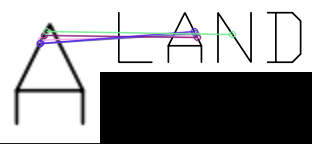

In [2]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow

import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow

image1 = cv.imread('/content/drive/MyDrive/Colab Notebooks/Screen Shot 2024-02-22 at 16.40.49.png', cv.IMREAD_GRAYSCALE)
image2 = cv.imread('/content/drive/MyDrive/Colab Notebooks/LAND.png', cv.IMREAD_GRAYSCALE)

# Create ORB detector
orb = cv.ORB_create()

# Detect ORB keypoints and descriptors for both images
kp1, descriptors1 = orb.detectAndCompute(image1, None)
kp2, descriptors2 = orb.detectAndCompute(image2, None)

# Print coordinates of keypoints from image 2
print("Coordinates of keypoints from image 2:")
for kp in kp2:
    print("x:", kp.pt[0], "y:", kp.pt[1])

# Create BFMatcher
bf = cv.BFMatcher(cv.NORM_HAMMING, crossCheck=True)

# Match descriptors
matches = bf.match(descriptors1, descriptors2)
matches = sorted(matches, key=lambda x: x.distance)

# Draw matches
matched_image = cv.drawMatches(image1, kp1, image2, kp2, matches[:10], None, flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

cv2_imshow(matched_image)
cv.waitKey(0)
cv.destroyAllWindows()



In [ ]:
import cv2 as cv
from google.colab.patches import cv2_imshow

# Load images
image1 = cv.imread('/content/drive/MyDrive/Colab Notebooks/A.png', cv.IMREAD_GRAYSCALE)
image2 = cv.imread('/content/drive/MyDrive/Colab Notebooks/LAND.png', cv.IMREAD_GRAYSCALE)

# Detect MIL-DTL-7788 keypoints
# Note: implement detect_mil_kp() function
#
kp1 = detect_mil_kp(image1)
kp2 = detect_mil_kp(image2)

# Create dummy descriptors (as MIL-DTL-7788 does not directly provide descriptors)
descriptors1 = np.zeros((len(kp1), 128), dtype=np.uint8)
descriptors2 = np.zeros((len(kp2), 128), dtype=np.uint8)

# Print coordinates of keypoints from image 2
print("Coordinates of keypoints from image 2:")
for kp in kp2:
    print("x:", kp.pt[0], "y:", kp.pt[1])

# Create BFMatcher
bf = cv.BFMatcher(cv.NORM_HAMMING, crossCheck=True)

# Match descriptors
matches = bf.match(descriptors1, descriptors2)
matches = sorted(matches, key=lambda x: x.distance)

# Draw matches
matched_image = cv.drawMatches(image1, kp1, image2, kp2, matches[:10], None, flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

cv2_imshow(matched_image)
cv.waitKey(0)
cv.destroyAllWindows()
